This requires you to write a 2D GAN game. I let you to get into the topic yourself, whitout any explonations from my side. You can watch internet, read papers and tutorials (fun, fun, fun).

### Homework

I want you to implement a simple 2D GAN game. The kind of animation, I want to see is like in [this video](https://www.youtube.com/watch?v=KeJINHjyzOU&feature=youtu.be&t=15m38s) at 15:36 or in [here](https://habrahabr.ru/post/275429/) **but in 2D**. You can google, search code at github, whatever, but the network should be based on TensoFlow.

Basically you will need to come up with true distribution $P$, say mixture of gaussians (surprise me), sample some data from it. Visualize it as a heatmap. To visualize $G$ density you can fix $N$ noise vectors $\{z_i\} \quad i=1,\dots, N$ and draw a circle for each $G(z_i)$. It is also funny to visualize discriminator as a vector field (can be done with `plt.arrow`, `plt.quiver` plot). Look how it should be in the middle of [this page](http://www.inference.vc/an-alternative-update-rule-for-generative-adversarial-networks/).

Please, make sure your code works if 'Run All' is pressed and it draws some animation.

Good luck!

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from IPython import display

In [2]:
#Generating the data
def y_inator(data):
    return 100 * np.cos(data/5)
def data_inator(amount):
    data = []
    x = 100*(np.random.random_sample((amount))-0.5)
    for i in range(amount):
        data.append([x[i], y_inator(x[i])])
    return np.array(data)

batch_size = 100
N = 4200

In [3]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 2])

In [4]:
def generator(Y, reuse):
    with tf.variable_scope("generator", reuse = reuse):
        g1 = tf.layers.dense(Y, 128, activation = tf.nn.leaky_relu)
        g2 = tf.layers.dense(g1, 64, activation = tf.nn.leaky_relu)
        g3 = tf.layers.dense(g2, 32, activation = tf.nn.leaky_relu)
        g4 = tf.layers.dense(g3, 16, activation = tf.nn.leaky_relu)
        g5 = tf.layers.dense(g4, 8, activation = tf.nn.leaky_relu)
        g0 = tf.layers.dense(g5, 2)
    return g0

def discriminator(X, reuse):
    with tf.variable_scope("discriminator", reuse = reuse):
        d1 = tf.layers.dense(X, 128, activation = tf.nn.leaky_relu)
        d2 = tf.layers.dense(d1, 64, activation = tf.nn.leaky_relu)
        d3 = tf.layers.dense(d2, 32, activation = tf.nn.leaky_relu)
        d4 = tf.layers.dense(d3, 16, activation = tf.nn.leaky_relu)
        d5 = tf.layers.dense(d4, 8, activation = tf.nn.leaky_relu)
        d0 = tf.layers.dense(d5, 2)
    return d0

In [5]:
sample = generator(Y, reuse = False)
logits = discriminator(X, reuse = False)
logits_sample = discriminator(sample, reuse = True)

In [6]:
#generator loss
loss_gen = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_sample,
                                                                  labels=tf.ones_like(logits_sample)))

#discriminator loss
loss_disc = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                                   labels=tf.ones_like(logits)) 
                           + tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_sample,
                                                                     labels=tf.zeros_like(logits_sample)))

In [7]:
#get seperate variables
gen_var = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='generator')
disc_var = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='discriminator')

In [8]:
optimizer = tf.train.AdamOptimizer()
gen_op = optimizer.minimize(loss_gen, var_list = gen_var)
disc_op = optimizer.minimize(loss_disc, var_list = disc_var)

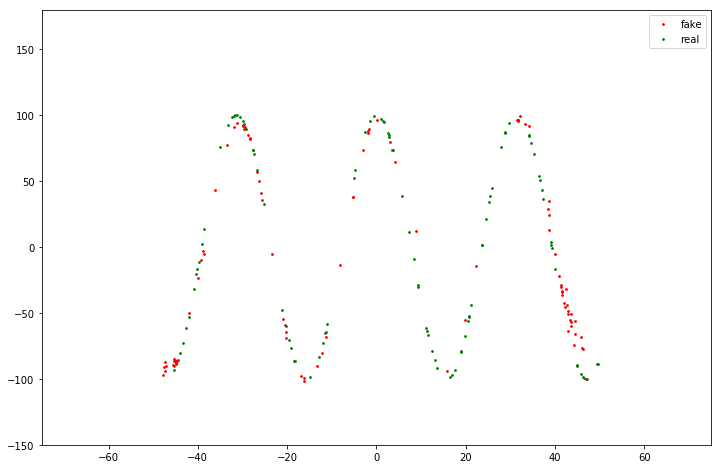

119800 th iteration
The genertor loss is 1.0538253 The genertor loss is 1.1806843


In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    target = np.random.uniform(-1, 2, (100, 2))
    data = data_inator(100)
    all_data = data_inator(N)
    for i in range(120000):
        X_batch = all_data[(i*batch_size)%(N-batch_size):(i*batch_size)%(N-batch_size)+batch_size,:]
        Y_batch = np.random.uniform(-1, 2, (batch_size, 2))
        _, gen_loss = sess.run([gen_op, loss_gen], feed_dict={Y: Y_batch})
        _, disc_loss = sess.run([disc_op, loss_disc], feed_dict={X: X_batch, Y: Y_batch})
        
        if i%200 == 0:
            plt.figure(figsize = (12,8))
            display.clear_output(wait=True)            
            tar_based_dat = sess.run([sample], {Y: target})[0]
            plt.scatter(tar_based_dat.T[0], tar_based_dat.T[1], label = "fake", c = 'red', s = 3)
            plt.scatter(data.T[0], data.T[1], label = "real", c = 'green', s = 3)
            axes = plt.gca()
            axes.set_xlim([-75,75])
            axes.set_ylim([-150,180])
            plt.legend();
            plt.show()
            print(i, "th iteration")
            print("The genertor loss is", gen_loss, "The genertor loss is", disc_loss)